In [3]:
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.dataloaders import *

# Default of Credit Card Clients Dataset

In [4]:
credit_df = pd.read_csv('../data/default_of_credit_card_clients.csv')

In [5]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
credit_df["SEX"] = credit_df["SEX"].map({1: "Male", 2: "Female"})  # 1: Male, 2: Female
credit_df["default payment next month"] = credit_df["default payment next month"].map({1: "Yes", 0: "No"})  # 1: Default, 2: No Default

### SEX

In [7]:
credit_df["SEX"].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

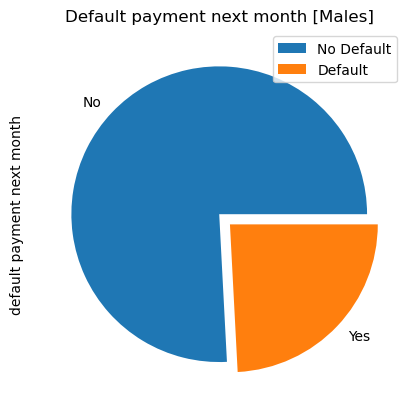

In [8]:
credit_df[credit_df["SEX"] == "Male"]["default payment next month"].value_counts().plot(kind="pie", explode=[0, 0.1])

plt.title("Default payment next month [Males]")
plt.legend(["No Default", "Default"], loc="upper right")
plt.show()

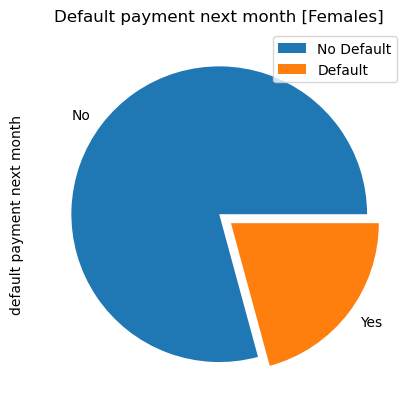

In [9]:
credit_df[credit_df["SEX"] == "Female"]["default payment next month"].value_counts().plot(kind="pie", explode=[0, 0.1])

plt.title("Default payment next month [Females]")
plt.legend(["No Default", "Default"], loc="upper right")
plt.show()

Ratio for Males

In [10]:
credit_df[credit_df["SEX"] == "Male"]["default payment next month"].value_counts() / len(credit_df[credit_df["SEX"] == "Male"])

No     0.758328
Yes    0.241672
Name: default payment next month, dtype: float64

Ratio for Females

In [11]:
credit_df[credit_df["SEX"] == "Female"]["default payment next month"].value_counts() / len(credit_df[credit_df["SEX"] == "Female"])

No     0.792237
Yes    0.207763
Name: default payment next month, dtype: float64

### AGE

In [12]:
credit_df['AGE'] = (credit_df["AGE"] > 50).astype(int)

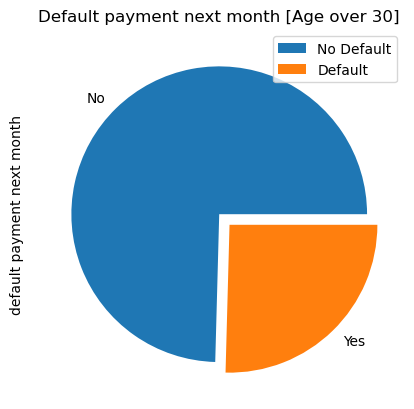

In [13]:
credit_df[credit_df["AGE"] == 1]["default payment next month"].value_counts().plot(kind="pie", explode=[0, 0.1])

plt.title("Default payment next month [Age over 30]")
plt.legend(["No Default", "Default"], loc="upper right")
plt.show()

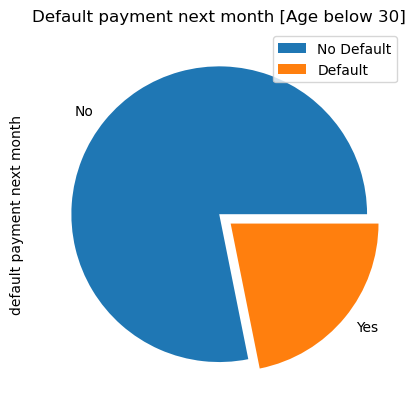

In [14]:
credit_df[credit_df["AGE"] == 0]["default payment next month"].value_counts().plot(kind="pie", explode=[0, 0.1])

plt.title("Default payment next month [Age below 30]")
plt.legend(["No Default", "Default"], loc="upper right")
plt.show()

In [15]:
credit_df[credit_df["AGE"] == 1]["default payment next month"].value_counts() / len(credit_df[credit_df["AGE"] == 1])

No     0.745703
Yes    0.254297
Name: default payment next month, dtype: float64

In [16]:
credit_df[credit_df["AGE"] == 0]["default payment next month"].value_counts() / len(credit_df[credit_df["AGE"] == 0])

No     0.781508
Yes    0.218492
Name: default payment next month, dtype: float64

---

# German Statlog Dataset

In [17]:
device = 'cpu'
np.random.seed(0)

german_dataset = GermanDataset(device=device, sensitive_feature_labels=["Age", "Sex"])

In [18]:
german_dataset.train_dataset["Sex"] = german_dataset.train_dataset["Sex"].map({0: "Male", 1: "Female"})  # 1: Male, 2: Female

### SEX

In [19]:
german_dataset.train_dataset["Sex"].value_counts()

Male      545
Female    255
Name: Sex, dtype: int64

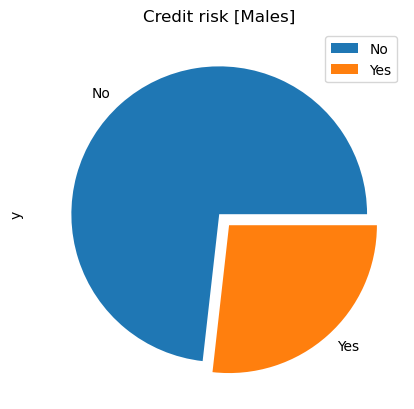

In [20]:
german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Male"]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Credit risk [Males]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

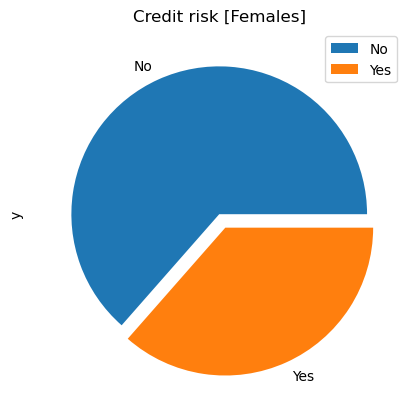

In [21]:
german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Female"]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Credit risk [Females]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

Ratio for Males

In [22]:
german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Male"]["y"].value_counts() / len(german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Male"])

1    0.73211
0    0.26789
Name: y, dtype: float64

Ratio for Females

In [23]:
german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Female"]["y"].value_counts() / len(german_dataset.train_dataset[german_dataset.train_dataset["Sex"] == "Female"])

1    0.635294
0    0.364706
Name: y, dtype: float64

### AGE

In [24]:
german_dataset.train_dataset["Age"].value_counts()

1    470
0    330
Name: Age, dtype: int64

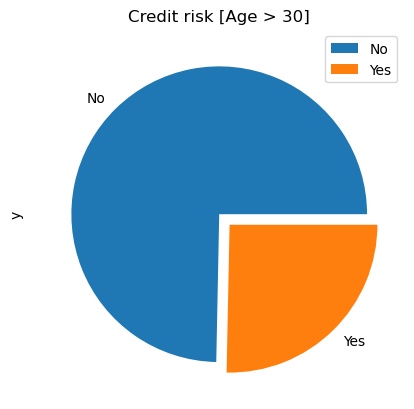

In [25]:
german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 1]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Credit risk [Age > 30]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

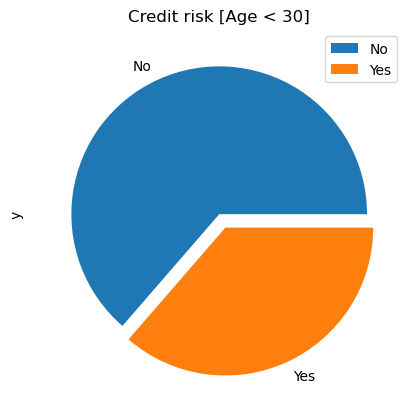

In [26]:
german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 0]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Credit risk [Age < 30]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

Ratio for Males

In [27]:
german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 1]["y"].value_counts() / len(german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 1])

1    0.746809
0    0.253191
Name: y, dtype: float64

Ratio for Females

In [28]:
german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 0]["y"].value_counts() / len(german_dataset.train_dataset[german_dataset.train_dataset["Age"] == 0])

1    0.636364
0    0.363636
Name: y, dtype: float64

# ACS-Income Dataset

In [29]:
device = 'cpu'
np.random.seed(0)

income_dataset = IncomeDataset(device=device, sensitive_feature_labels=["SEX", "AGEP"])

In [30]:
income_dataset.train_dataset.head()

,AGEP,SCHL,WKHP,SEX,COW_2.0,COW_3.0,COW_4.0,COW_5.0,COW_6.0,COW_7.0,...,RELP_17.0,RAC1P_2.0,RAC1P_3.0,RAC1P_4.0,RAC1P_5.0,RAC1P_6.0,RAC1P_7.0,RAC1P_8.0,RAC1P_9.0,y
0,1,22.0,0.547399,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,21.0,0.930903,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,21.0,0.163895,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,24.0,0.163895,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,19.0,0.163895,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SEX

In [31]:
income_dataset.train_dataset["SEX"] = income_dataset.train_dataset["SEX"].map({0: "Male", 1: "Female"})  # 1: Male, 2: Female

In [32]:
income_dataset.train_dataset["SEX"].value_counts()

Male      82690
Female    73842
Name: SEX, dtype: int64

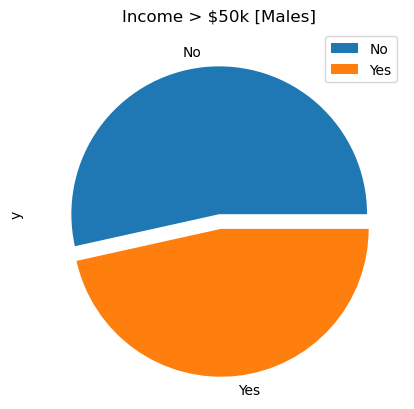

In [33]:
income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Male"]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Income > $50k [Males]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

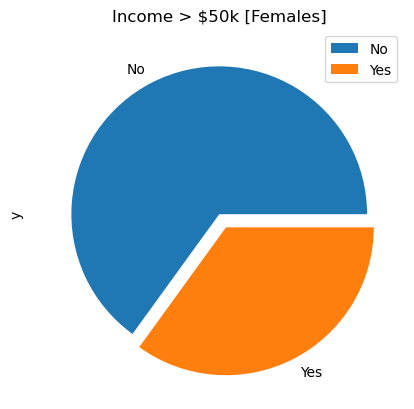

In [34]:
income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Female"]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Income > $50k [Females]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

Ratio for Males

In [35]:
income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Male"]["y"].value_counts() / len(income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Male"])

0    0.534744
1    0.465256
Name: y, dtype: float64

Ratio for Females

In [36]:
income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Female"]["y"].value_counts() / len(income_dataset.train_dataset[income_dataset.train_dataset["SEX"] == "Male"])

0    0.580651
1    0.312347
Name: y, dtype: float64

### AGE

In [37]:
income_dataset.train_dataset["AGEP"].value_counts()

1    116032
0     40500
Name: AGEP, dtype: int64

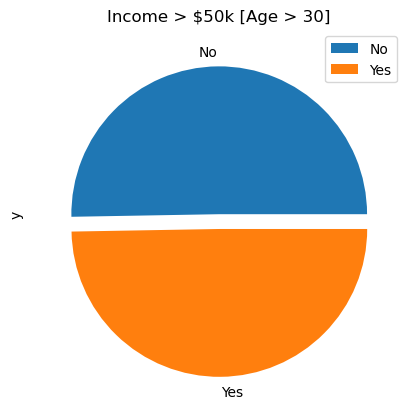

In [38]:
income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 1]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Income > $50k [Age > 30]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

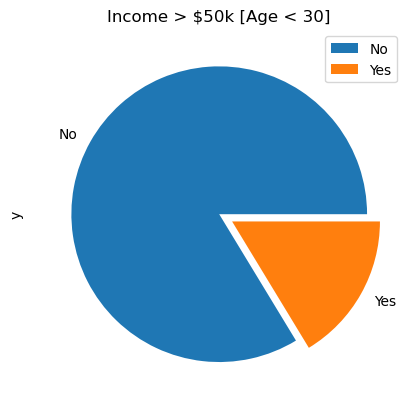

In [39]:
income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 0]["y"].value_counts().plot(kind="pie", explode=[0, 0.1], labels=["No", "Yes"])

plt.title("Income > $50k [Age < 30]")
plt.legend(["No", "Yes"], loc="upper right")
plt.show()

Ratio for Males

In [40]:
income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 1]["y"].value_counts() / len(income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 1])

0    0.502784
1    0.497216
Name: y, dtype: float64

Ratio for Females

In [41]:
income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 0]["y"].value_counts() / len(income_dataset.train_dataset[income_dataset.train_dataset["AGEP"] == 0])

0    0.836864
1    0.163136
Name: y, dtype: float64